# First things first

## 0. Import libraries

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
print(torch.__version__)
print(torchvision.__version__)

2.2.2+cpu
0.17.2+cpu


## 1. Get the data

In [3]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### 1.1 Visualize data

In [4]:
image, label = train_data[0]
print(image, label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [5]:
print(image.shape)
print(label)

torch.Size([1, 28, 28])
9


In [6]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [7]:
classes = train_data.classes
print(classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

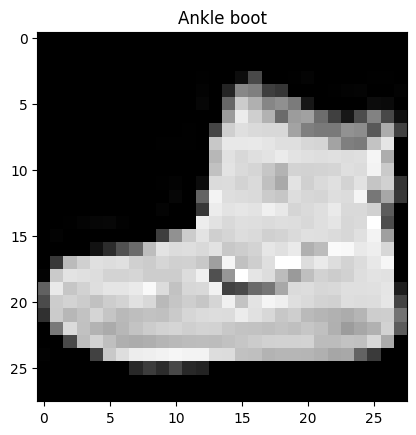

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(classes[label])

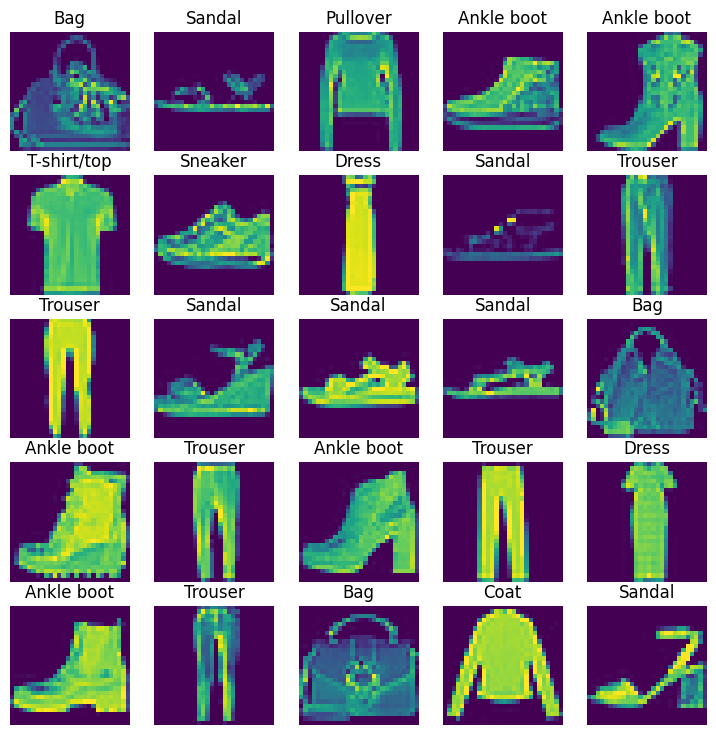

In [9]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 5, 5
for i in range(1, rows * cols + 1):
    j = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[j]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze())
    plt.title(classes[label])
    plt.axis(False)


## 2. Create DataLoader

In [10]:
from torch.utils.data import DataLoader

In [11]:
BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)

test_dataloader = DataLoader(
    test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

(1875, 313)

In [17]:
xt_batch, yt_batch = next(iter(train_dataloader))

len(train_dataloader), len(test_dataloader), xt_batch.shape, yt_batch.shape

(1875, 313, torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [21]:
len(xt_batch[0]),len(xt_batch[1]),len(xt_batch[2])

(1, 1, 1)

In [22]:
xt_batch[0].shape, xt_batch[1].shape, xt_batch[2].shape

(torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]))

## 3. Build model

### 3.1 Flatten layer

In [20]:
x0 = xt_batch[0]
model = nn.Flatten()
y0 = model(x0)

print(f"before flattening : {x0.shape}")
print(f"after flattening : {y0.shape}")

before flattening : torch.Size([1, 28, 28])
after flattening : torch.Size([1, 784])


### 3.2 Baseline model

In [23]:
from torch import nn

In [25]:
class FashionModule(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [27]:
model = FashionModule(
    input_shape=784,
    hidden_units=10,
    output_shape=len(classes)
)
model.to("cpu")

FashionModule(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)